In [252]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms

import data 

In [253]:
df = pd.read_pickle('../Dataframes/df_wind_gbg_save.pkl') 

In [254]:
df

,Datum,Tid_UTC,Vindriktning,Kvalitet,Vindhastighet,Vindhastighet_snitt,Högsta_vindhastighet
0,1951-01-01,00:00:00,100.0,G,3.0,3.29,5.0
1,1951-01-01,03:00:00,110.0,G,2.0,3.29,5.0
2,1951-01-01,06:00:00,70.0,G,2.0,3.29,5.0
3,1951-01-01,12:00:00,90.0,G,3.0,3.29,5.0
4,1951-01-01,15:00:00,70.0,G,4.0,3.29,5.0
...,...,...,...,...,...,...,...
305146,2023-07-01,02:00:00,249.0,G,3.1,2.47,3.5
305147,2023-07-01,03:00:00,226.0,G,2.2,2.47,3.5
305148,2023-07-01,04:00:00,223.0,G,2.3,2.47,3.5
305149,2023-07-01,05:00:00,217.0,G,1.9,2.47,3.5


In [255]:
# df.rename(columns={'Year': 'year'}, inplace=True)
df['Datum'] = pd.to_datetime(df['Datum'])
# df_year_wind = df.groupby(df['Datum'].dt.year)['Vindhastighet'].mean()
yearly_wind = df.groupby(df['Datum'].dt.year)['Vindhastighet'].agg(['mean', 'median']).reset_index()

yearly_wind.columns = ['Year', 'Mean Wind Speed', 'Median Wind Speed']



yearly_wind['Year'] = pd.to_datetime(yearly_wind['Year'], format='%Y')
yearly_wind.set_index('Year', inplace=True)


In [256]:
df_2 = pd.read_excel('../data/SCB_årlig_nybyggda lagenheter_göteborg_1975_2023.xlsx')

In [257]:
df_2.rename(columns={'Year': 'year'}, inplace=True)
df_2['year'] = pd.to_datetime(df_2['year'], format='%Y')
df_2.set_index('year', inplace=True)
df_2['total_housing'] = df_2['flerbostadshus'] + df_2['småhus']

In [258]:
df_2

,flerbostadshus,småhus,total_housing
year,,,
1975-01-01,2250,1479,3729
1976-01-01,996,1158,2154
1977-01-01,1307,782,2089
1978-01-01,925,961,1886
1979-01-01,584,1178,1762
1980-01-01,1213,990,2203
1981-01-01,638,762,1400
1982-01-01,1052,785,1837
1983-01-01,571,597,1168


In [259]:
df_3= pd.read_csv('../data/lagenhettillväxt_riket_nivådata.csv')

In [260]:
# Create a new DataFrame with the desired index
new_index = pd.date_range(start='1975-01-01', end='2022-01-01', freq='AS')
new_df = pd.DataFrame(index=new_index)

# Extract the 'Mean Wind Data' and 'total housing' columns
mean_wind_data = yearly_wind['Mean Wind Speed']
total_housing = df_2['total_housing']

new_df['Mean Wind Data'] = mean_wind_data
new_df['Total Housing'] = total_housing

In [261]:
new_df

,Mean Wind Data,Total Housing
1975-01-01,5.329069,3729
1976-01-01,3.793410,2154
1977-01-01,3.970880,2089
1978-01-01,4.154586,1886
1979-01-01,4.016907,1762
1980-01-01,3.324371,2203
1981-01-01,4.215411,1400
1982-01-01,4.581316,1837
1983-01-01,4.401279,1168
1984-01-01,3.891913,1406


# Summary statistics

In [262]:
summary_wind = yearly_wind['Mean Wind Speed'].describe()

# Calculate summary statistics for 'Total_Nederbördsmängd' in df2
summary_bygg_data = df_2['total_housing'].describe()

# Combine the summary statistics into a single DataFrame
summary_table = pd.concat([summary_wind, summary_bygg_data], axis=1)
summary_table.columns = ['Mean Wind Data', 'Total yearly new apartments']

print(summary_table)

       Mean Wind Data  Total yearly new apartments
count       73.000000                    48.000000
mean         3.990813                  1842.625000
std          0.855521                  1100.511808
min          2.501438                   435.000000
25%          3.487524                  1177.750000
50%          3.984627                  1561.000000
75%          4.581316                  2105.250000
max          5.688818                  5621.000000


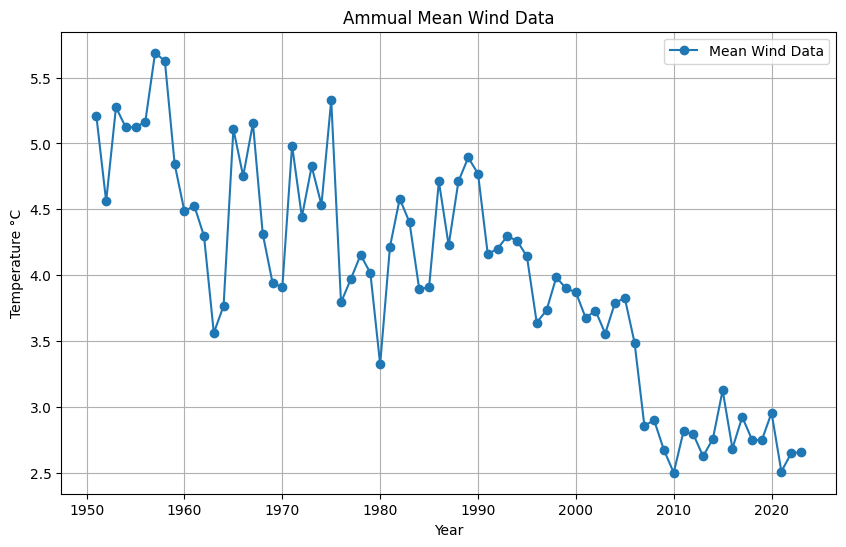

In [263]:
# scatterplot with wind data & total yearly new apartments 
plt.figure(figsize=(10, 6))
plt.plot(yearly_wind.index, yearly_wind['Mean Wind Speed'], label='Mean Wind Data', marker='o')
plt.title('Ammual Mean Wind Data')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.grid(True)
plt.legend()
plt.show()

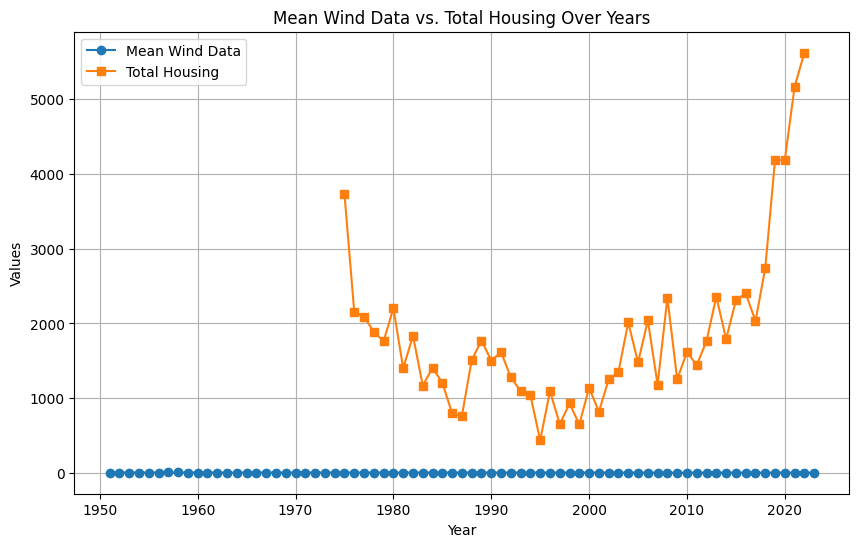

In [264]:
# scatterplot with wind data & total yearly new apartments 
plt.figure(figsize=(10, 6))
plt.plot(yearly_wind.index, yearly_wind['Mean Wind Speed'], label='Mean Wind Data', marker='o')
plt.plot(df_2.index, df_2['total_housing'], label='Total Housing', marker='s')
plt.title('Mean Wind Data vs. Total Housing Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()


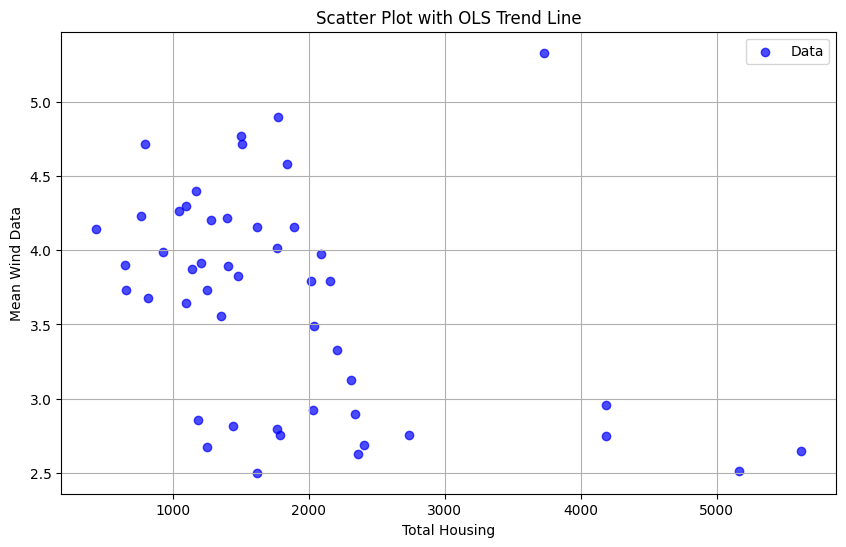

In [265]:
# LOOK AT A SCATTERPLOT WITH ANNUAL HOUSING PRODUCTION AND AVERAGE YEARLY WIND SPEAD 
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
# plt.plot(new_df['Total Housing'], color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

In [266]:

X = sm.add_constant(new_df['Total Housing'])

# Perform the linear regression
model = sm.OLS(new_df['Mean Wind Data'], X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Mean Wind Data   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     9.287
Date:                Mon, 30 Oct 2023   Prob (F-statistic):            0.00382
Time:                        21:48:27   Log-Likelihood:                -48.516
No. Observations:                  48   AIC:                             101.0
Df Residuals:                      46   BIC:                             104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1607      0.193     21.595

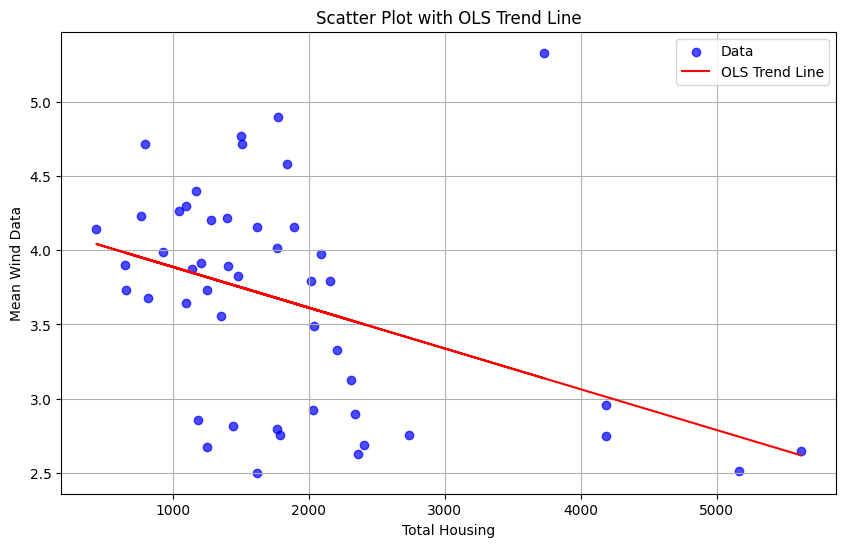

In [267]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Housing'], new_df['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
plt.plot(new_df['Total Housing'], model.predict(X), color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

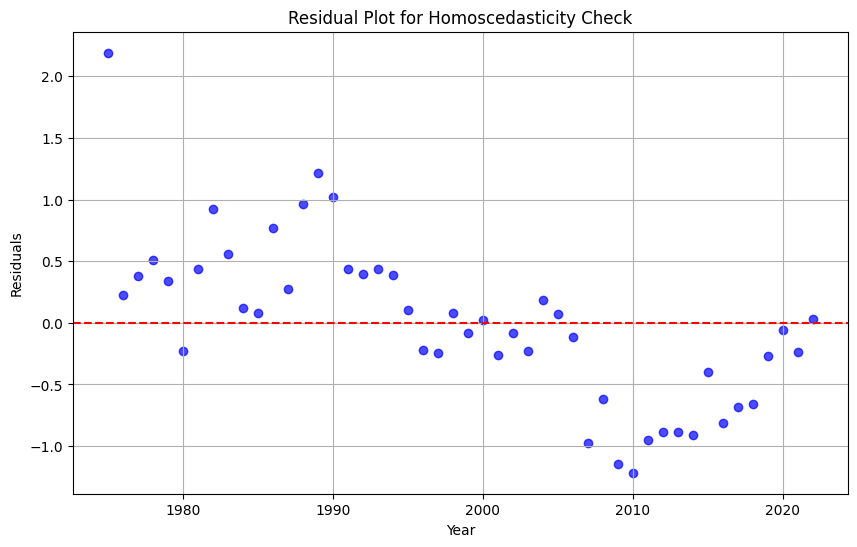

In [268]:
# Calculate the residuals
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df.index, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [277]:
# Calculate the Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

# Extract the test statistics and p-values
test_statistic = bp_test[0]
p_value = bp_test[1]

# Print the test results
print("Breusch-Pagan Test:")
print(f"Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Interpret the p-value to determine if heteroscedasticity is present
if p_value < 0.05:
    print("Heteroscedasticity is indicated (reject the null hypothesis).")
else:
        print("Heteroscedasticity is not indicated (fail to reject the null hypothesis).")

Breusch-Pagan Test:
Test Statistic: 1.2347392945156699
P-Value: 0.2664873340914558
Heteroscedasticity is not indicated (fail to reject the null hypothesis).


2nd try without outliers

given the large outliers in the data. They will be removed. 

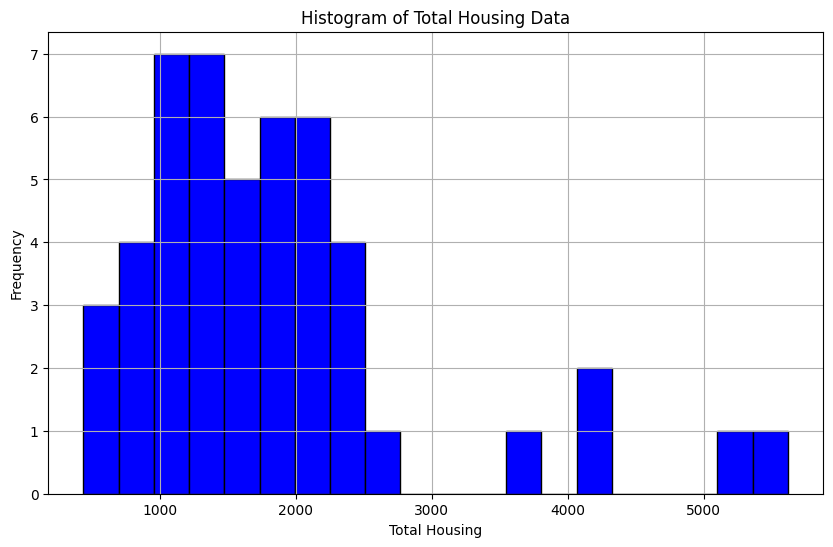

In [269]:
plt.figure(figsize=(10, 6))
plt.hist(total_housing, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Total Housing Data')
plt.xlabel('Total Housing')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




In [270]:
# remove outliers in total housing above 3000 

total_housing = df_2['total_housing']

# Remove outliers above 3000
total_housing_no_outliers = total_housing[total_housing <= 3000]
total_housing_no_outliers = pd.DataFrame(total_housing_no_outliers)


In [271]:
print(total_housing_no_outliers)

            total_housing
year                     
1976-01-01           2154
1977-01-01           2089
1978-01-01           1886
1979-01-01           1762
1980-01-01           2203
1981-01-01           1400
1982-01-01           1837
1983-01-01           1168
1984-01-01           1406
1985-01-01           1207
1986-01-01            796
1987-01-01            764
1988-01-01           1507
1989-01-01           1771
1990-01-01           1503
1991-01-01           1615
1992-01-01           1280
1993-01-01           1092
1994-01-01           1042
1995-01-01            435
1996-01-01           1094
1997-01-01            652
1998-01-01            929
1999-01-01            648
2000-01-01           1138
2001-01-01            818
2002-01-01           1251
2003-01-01           1351
2004-01-01           2014
2005-01-01           1477
2006-01-01           2040
2007-01-01           1181
2008-01-01           2342
2009-01-01           1252
2010-01-01           1617
2011-01-01           1442
2012-01-01  

In [272]:
years_with_data = total_housing_no_outliers.index.year

# Filter 'new_df' to include only the years present in 'years_with_data'
new_df_filtered = new_df[new_df.index.year.isin(years_with_data)]

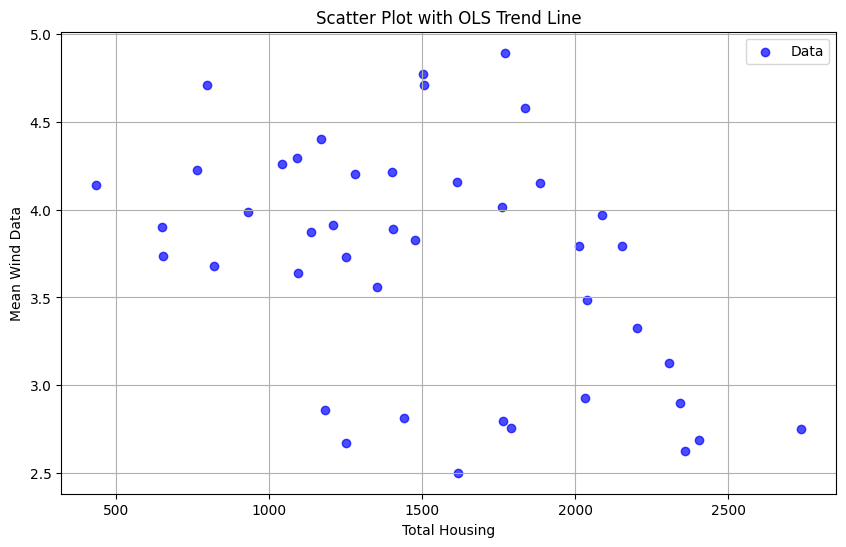

In [273]:
# LOOK AT A SCATTERPLOT WITH ANNUAL HOUSING PRODUCTION AND AVERAGE YEARLY WIND SPEAD 
plt.figure(figsize=(10, 6))
plt.scatter(total_housing_no_outliers['total_housing'], new_df_filtered['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
# plt.plot(new_df['Total Housing'], color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

In [275]:

X = sm.add_constant(total_housing_no_outliers['total_housing'])

# Perform the linear regression
model_2 = sm.OLS(new_df_filtered['Mean Wind Data'], X).fit()

# Print the summary of the regression analysis
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Mean Wind Data   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     9.507
Date:                Mon, 30 Oct 2023   Prob (F-statistic):            0.00365
Time:                        21:48:37   Log-Likelihood:                -38.926
No. Observations:                  43   AIC:                             81.85
Df Residuals:                      41   BIC:                             85.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5116      0.278     16.218

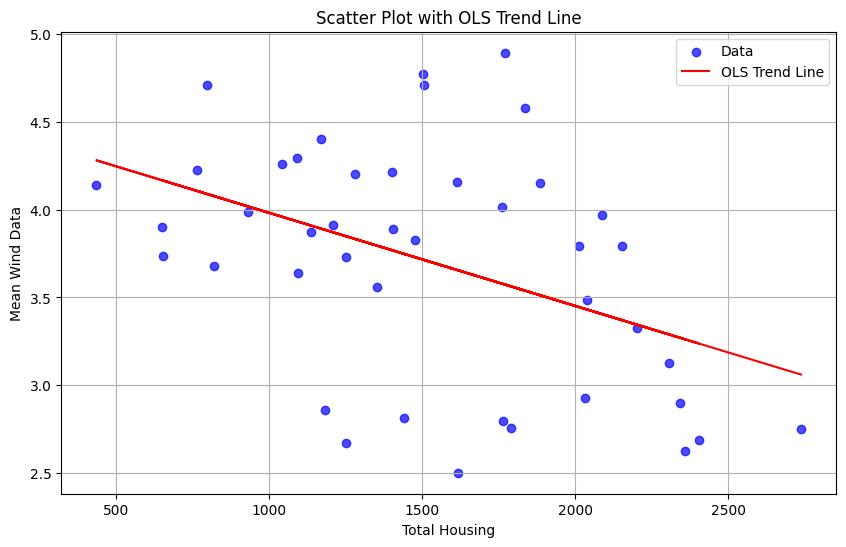

In [225]:
plt.figure(figsize=(10, 6))
plt.scatter(total_housing_no_outliers['total_housing'], new_df_filtered['Mean Wind Data'], color='blue', alpha=0.7, label='Data')
plt.plot(total_housing_no_outliers['total_housing'], model_2.predict(X), color='red', label='OLS Trend Line')
plt.title('Scatter Plot with OLS Trend Line')
plt.xlabel('Total Housing')
plt.ylabel('Mean Wind Data')
plt.grid(True)
plt.legend()
plt.show()

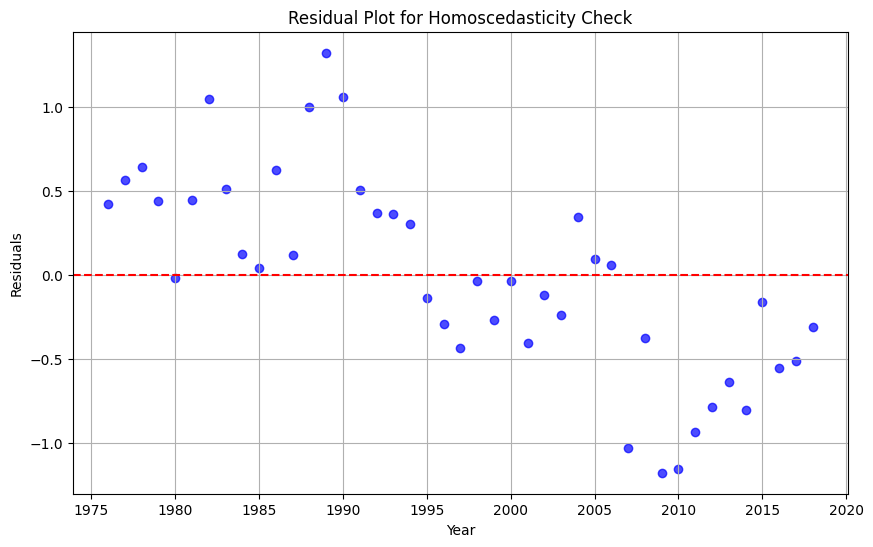

In [226]:
# Calculate the residuals
residuals_2 = model_2.resid

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df_filtered.index, residuals_2, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [276]:
# Calculate the Breusch-Pagan test
bp_test = sms.het_breuschpagan(model_2.resid, model_2.model.exog)

# Extract the test statistics and p-values
test_statistic = bp_test[0]
p_value = bp_test[1]

# Print the test results
print("Breusch-Pagan Test:")
print(f"Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Interpret the p-value to determine if heteroscedasticity is present
if p_value < 0.05:
    print("Heteroscedasticity is indicated (reject the null hypothesis).")
else:
        print("Heteroscedasticity is not indicated (fail to reject the null hypothesis).")

Breusch-Pagan Test:
Test Statistic: 0.3681691551558651
P-Value: 0.5440039306171791
Heteroscedasticity is not indicated (fail to reject the null hypothesis).
